In [52]:
from qiskit import *
from qiskit.visualization import plot_bloch_multivector, plot_histogram, array_to_latex
from math import pi
%matplotlib inline

# Get key from environment
import os
IBM_TOKEN = os.environ['IQP_API_TOKEN']

from qiskit_ibm_runtime import QiskitRuntimeService
# Make sure account is saved, uncomment if not done yet
# QiskitRuntimeService.save_account(token=IBM_TOKEN)

## Goal:

For this exercise we need to teleport the 3rd qubit to the first qubit. So the output qubit will be qubit 0.

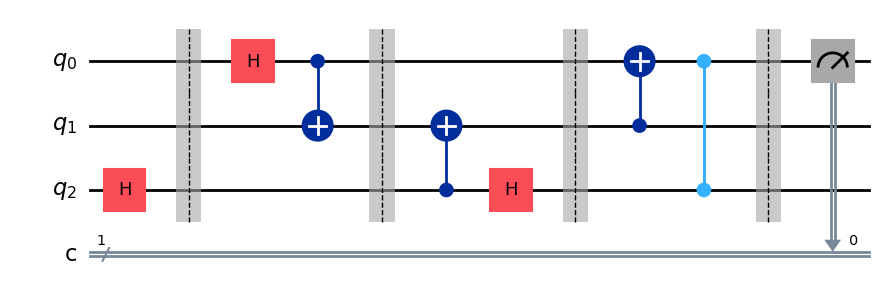

In [53]:
# Build the initial circuit
q = QuantumRegister(3, name='q')
c = ClassicalRegister(1, name='c')

qc = QuantumCircuit(q, c)

# Initialize qubit to teleport
qc.h(2)
qc.barrier()

# Prepare Bell State
qc.h(0)
qc.cx(0, 1)
qc.barrier()

# Perform Bell state measurement
qc.cx(2, 1)
qc.h(2)
qc.barrier()

# Set up deferred measurement
qc.cx(1, 0)
qc.cz(0, 2)

qc.barrier()
qc.measure(0, 0)

qc.draw('mpl');

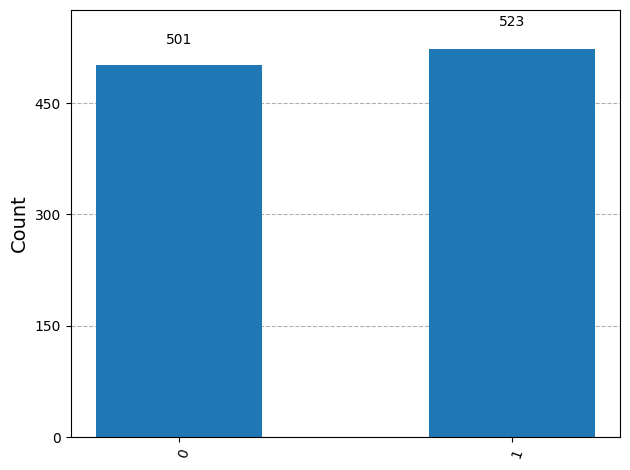

In [54]:
from qiskit.providers.basic_provider import BasicProvider
simulator = BasicProvider().get_backend('basic_simulator')
compiled_circuit = transpile(qc, simulator)
result = simulator.run(compiled_circuit).result()
plot_histogram(result.get_counts());

In [55]:
service = QiskitRuntimeService(instance='main-free-us')

ibm_fez


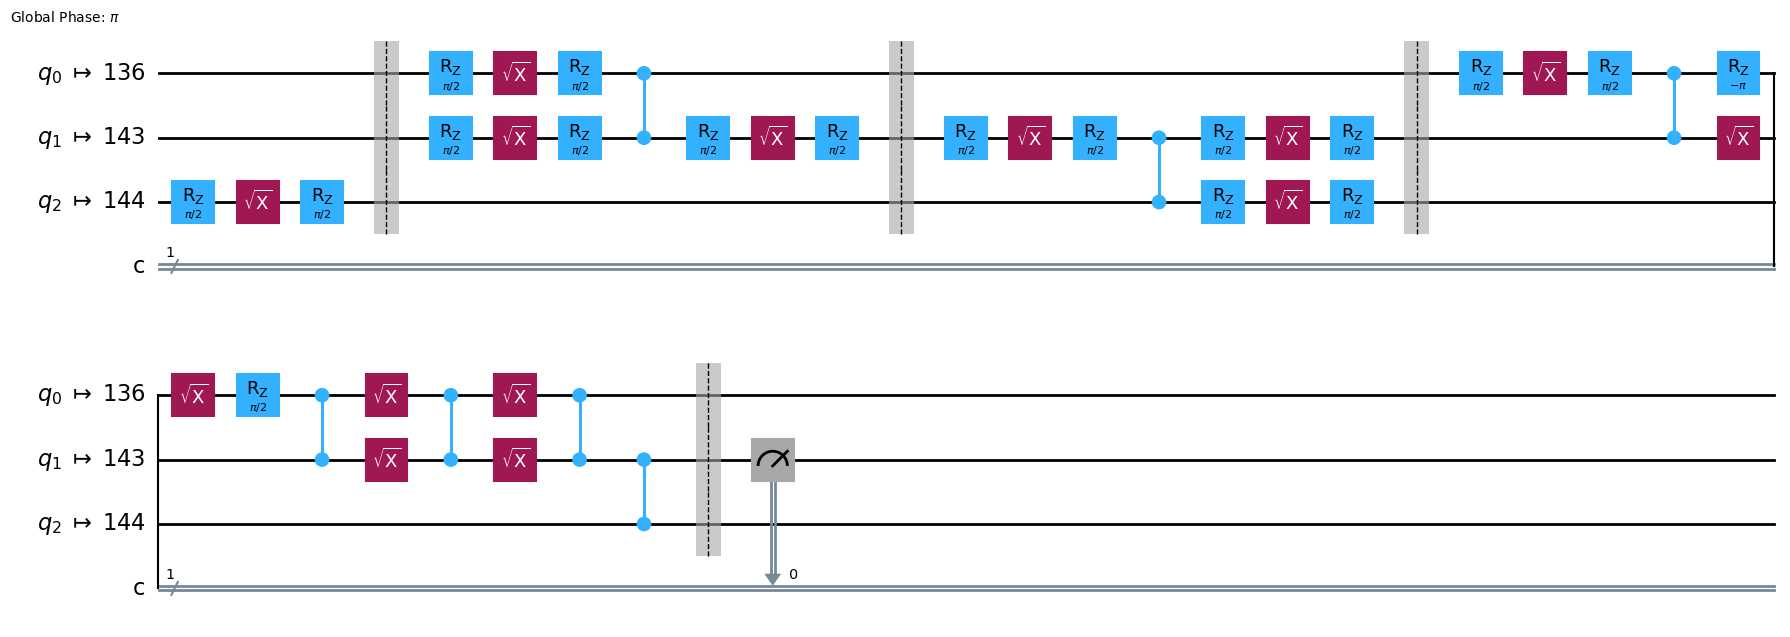

In [56]:
backend = service.least_busy(simulator=False, operational=True)
print(backend.name)
pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
isa_qc = pm.run(qc)
isa_qc.draw('mpl');

In [57]:
from qiskit_ibm_runtime import SamplerV2 as Sampler
sampler = Sampler(mode=backend)
job = sampler.run([(isa_qc)], shots=10)

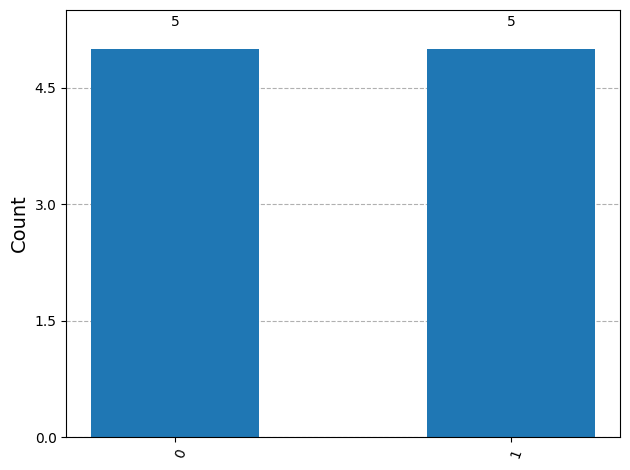

In [62]:
result = job.result()[0]
result.data.c.get_bitstrings()
plot_histogram(result.data.c.get_counts());